In [1]:
from fredapi import Fred
import pandas as pd

FRED_API_KEY='84dda3c4ef4e2d9ec558e86012ba6876'
fred = Fred(FRED_API_KEY)

fftr = fred.get_series('DFEDTARU')  
cpi = fred.get_series('CPIAUCSL') 
unemployment = fred.get_series('UNRATE')  
gdp_growth = fred.get_series('A191RL1Q225SBEA')  
treasury_yield = fred.get_series('GS10') 


data = pd.DataFrame({
    'FFTR': fftr,
    'CPI': cpi,
    'Unemployment': unemployment,
    'GDPGrowth': gdp_growth,
    '10Y_Treasury': treasury_yield
})

data.to_csv('macro_data.csv')


            FFTR    CPI  Unemployment  GDPGrowth  10Y_Treasury
DATE                                                          
1947-01-01   NaN  21.48           NaN        NaN           NaN
1947-02-01   NaN  21.62           NaN        NaN           NaN
1947-03-01   NaN  22.00           NaN        NaN           NaN
1947-04-01   NaN  22.00           NaN       -1.0           NaN
1947-05-01   NaN  21.95           NaN        NaN           NaN
FFTR             744
CPI             5654
Unemployment    5666
GDPGrowth       6279
10Y_Treasury    5729
dtype: int64


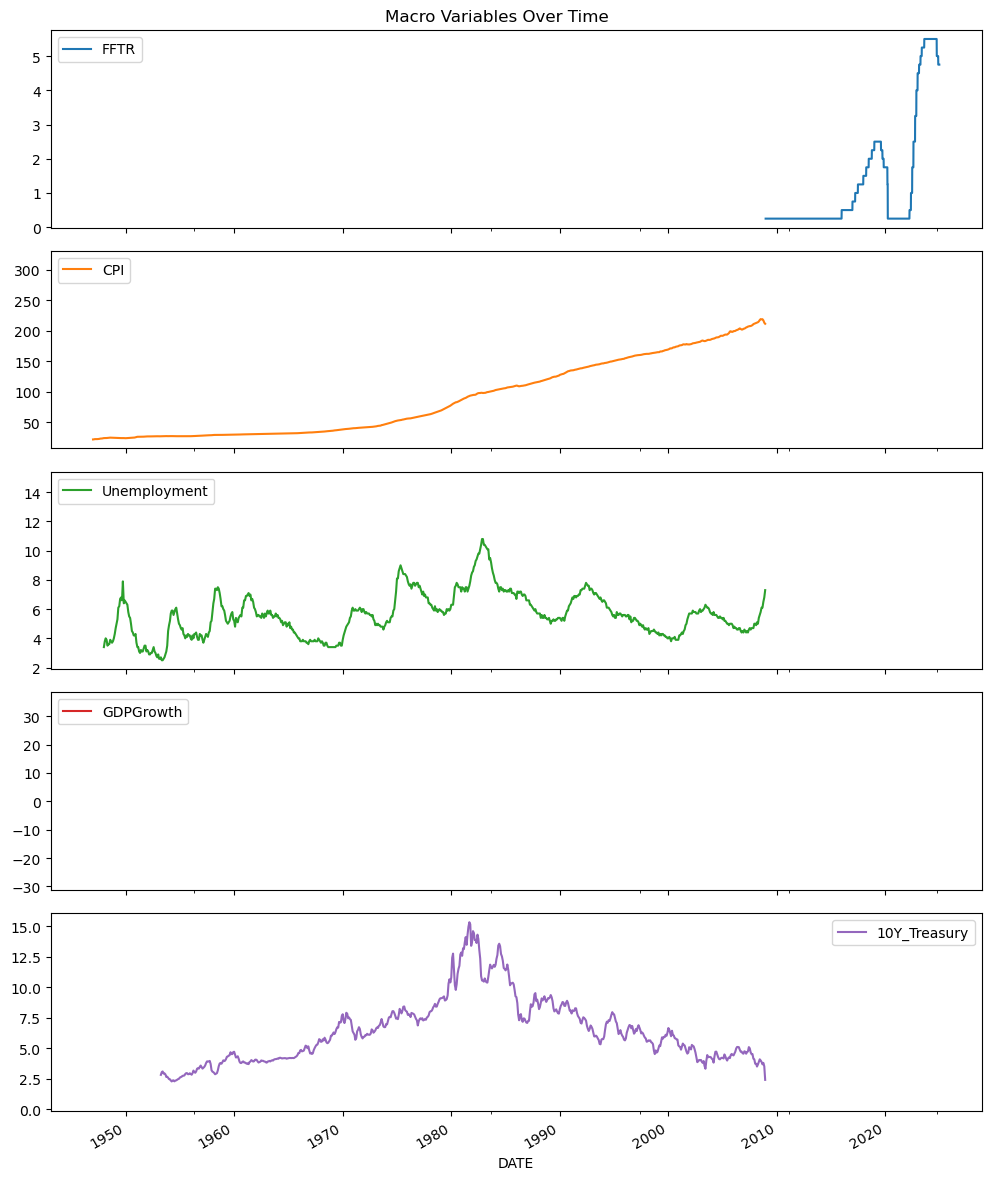

In [2]:
import pandas as pd

data = pd.read_csv('macro_data.csv', parse_dates=['DATE'], index_col='DATE')

print(data.head())

print(data.isnull().sum())

import matplotlib.pyplot as plt

data.plot(subplots=True, figsize=(10, 12), title='Macro Variables Over Time')
plt.tight_layout()
plt.show()


Initial Data Check
Missing values per column:
 FFTR             744
CPI             5654
Unemployment    5666
GDPGrowth       6279
10Y_Treasury    5729
dtype: int64
Infinite values per column:
 FFTR            0
CPI             0
Unemployment    0
GDPGrowth       0
10Y_Treasury    0
dtype: int64

After Cleaning:
Missing values per column:
 FFTR            0
CPI             0
Unemployment    0
GDPGrowth       0
10Y_Treasury    0
dtype: int64
Infinite values per column:
 FFTR            0
CPI             0
Unemployment    0
GDPGrowth       0
10Y_Treasury    0
dtype: int64


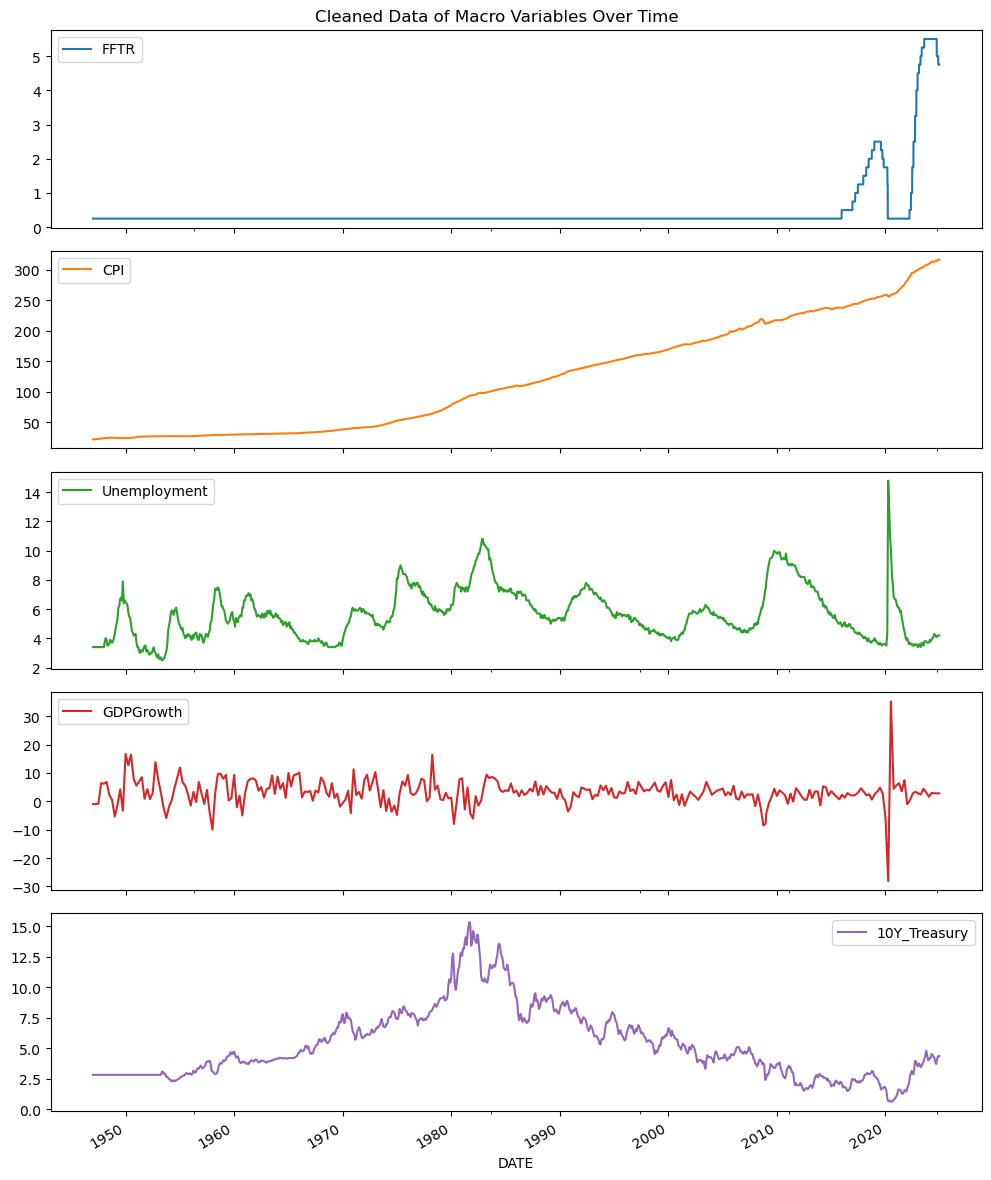

FFTR ADF Test:
ADF Statistic: 0.6851070397036582
p-value: 0.9895359204401157
Critical Values: {'1%': -3.431344807550553, '5%': -2.861979620556929, '10%': -2.567004006563164}
Non-Stationary
CPI ADF Test:
ADF Statistic: -4.055229522047148
p-value: 0.0011473827679163446
Critical Values: {'1%': -3.4313483005378655, '5%': -2.8619811639018327, '10%': -2.56700482811821}
Stationary
Unemployment ADF Test:
ADF Statistic: -2.725652319552597
p-value: 0.06970351281499912
Critical Values: {'1%': -3.4313483005378655, '5%': -2.8619811639018327, '10%': -2.56700482811821}
Non-Stationary
GDPGrowth ADF Test:
ADF Statistic: -8.532481806882933
p-value: 1.028754212996602e-13
Critical Values: {'1%': -3.431348148158869, '5%': -2.8619810965745867, '10%': -2.56700479227849}
Stationary
10Y_Treasury ADF Test:
ADF Statistic: -2.329064428630559
p-value: 0.16276536008714726
Critical Values: {'1%': -3.4313483005378655, '5%': -2.8619811639018327, '10%': -2.56700482811821}
Non-Stationary


In [3]:
import pandas as pd

data = pd.read_csv('macro_data.csv', parse_dates=['DATE'], index_col='DATE')

print("Initial Data Check")
print("Missing values per column:\n", data.isnull().sum())
print("Infinite values per column:\n", (data == float('inf')).sum() + (data == float('-inf')).sum())

data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

data = data.interpolate(method='linear')
data = data.fillna(method='ffill')  
data = data.fillna(method='bfill')  

print("\nAfter Cleaning:")
print("Missing values per column:\n", data.isnull().sum())
print("Infinite values per column:\n", (data == float('inf')).sum() + (data == float('-inf')).sum())


import matplotlib.pyplot as plt

data.plot(subplots=True, figsize=(10, 12), title='Cleaned Data of Macro Variables Over Time')
plt.tight_layout()
plt.show()


from statsmodels.tsa.stattools import adfuller


def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'{title} ADF Test:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:', result[4])
    print('Stationary' if result[1] <= 0.05 else 'Non-Stationary')


for column in data.columns:
    adf_test(data[column], title=column)


In [4]:
from statsmodels.tsa.stattools import adfuller


def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'{title} ADF Test:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:', result[4])
    print('Stationary' if result[1] <= 0.05 else 'Non-Stationary')


for column in data.columns:
    adf_test(data[column], title=column)


FFTR ADF Test:
ADF Statistic: 0.6851070397036582
p-value: 0.9895359204401157
Critical Values: {'1%': -3.431344807550553, '5%': -2.861979620556929, '10%': -2.567004006563164}
Non-Stationary
CPI ADF Test:
ADF Statistic: -4.055229522047148
p-value: 0.0011473827679163446
Critical Values: {'1%': -3.4313483005378655, '5%': -2.8619811639018327, '10%': -2.56700482811821}
Stationary
Unemployment ADF Test:
ADF Statistic: -2.725652319552597
p-value: 0.06970351281499912
Critical Values: {'1%': -3.4313483005378655, '5%': -2.8619811639018327, '10%': -2.56700482811821}
Non-Stationary
GDPGrowth ADF Test:
ADF Statistic: -8.532481806882933
p-value: 1.028754212996602e-13
Critical Values: {'1%': -3.431348148158869, '5%': -2.8619810965745867, '10%': -2.56700479227849}
Stationary
10Y_Treasury ADF Test:
ADF Statistic: -2.329064428630559
p-value: 0.16276536008714726
Critical Values: {'1%': -3.4313483005378655, '5%': -2.8619811639018327, '10%': -2.56700482811821}
Non-Stationary


In [5]:
print(data.columns)


Index(['FFTR', 'CPI', 'Unemployment', 'GDPGrowth', '10Y_Treasury'], dtype='object')


In [6]:


data['FFTR_diff'] = data['FFTR'].diff()
data['CPI_diff'] = data['CPI'].diff()
data['10Y_Treasury_diff'] = data['10Y_Treasury'].diff()


data_diff = data.dropna()


print(data_diff.head())



from statsmodels.tsa.stattools import adfuller


def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'{title} ADF Test:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:', result[4])
    print('Stationary' if result[1] <= 0.05 else 'Non-Stationary')

adf_test(data_diff['FFTR_diff'], title='FFTR (Differenced)')
adf_test(data_diff['CPI_diff'], title='CPI (Differenced)')
adf_test(data_diff['10Y_Treasury_diff'], title='10Y Treasury (Differenced)')


            FFTR    CPI  Unemployment  GDPGrowth  10Y_Treasury  FFTR_diff  \
DATE                                                                        
1947-02-01  0.25  21.62           3.4  -1.000000          2.83        0.0   
1947-03-01  0.25  22.00           3.4  -1.000000          2.83        0.0   
1947-04-01  0.25  22.00           3.4  -1.000000          2.83        0.0   
1947-05-01  0.25  21.95           3.4  -0.933333          2.83        0.0   
1947-06-01  0.25  22.08           3.4  -0.866667          2.83        0.0   

            CPI_diff  10Y_Treasury_diff  
DATE                                     
1947-02-01      0.14                0.0  
1947-03-01      0.38                0.0  
1947-04-01      0.00                0.0  
1947-05-01     -0.05                0.0  
1947-06-01      0.13                0.0  
FFTR (Differenced) ADF Test:
ADF Statistic: -21.381882697404546
p-value: 0.0
Critical Values: {'1%': -3.431344807550553, '5%': -2.861979620556929, '10%': -2.567004006

In [8]:
import statsmodels.api as sm


Y = data['FFTR']
X = data[['GDPGrowth', 'CPI', 'Unemployment', '10Y_Treasury']]


X_lagged = X.shift(1).dropna()  # Shift explanatory variables by 1 time period
Y_lagged = Y.shift(1).dropna()  # Shift FFTR by 1 time period

# Combine lagged variables
X_adl = pd.concat([Y_lagged, X_lagged], axis=1).dropna()
Y_adl = Y.loc[X_adl.index]

# Fit the ADL model
X_adl = sm.add_constant(X_adl)  # Add a constant for the intercept
adl_model = sm.OLS(Y_adl, X_adl).fit()

# Print the summary
print(adl_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   FFTR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.256e+06
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:44:43   Log-Likelihood:                 14097.
No. Observations:                6588   AIC:                        -2.818e+04
Df Residuals:                    6582   BIC:                        -2.814e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0046      0.003     -1.809   

In [9]:
import statsmodels.api as sm


aic_bic_results = []

for lags in range(1, 4): 
    # Create lagged explanatory variables
    X_lagged = pd.concat(
        [X.shift(i) for i in range(1, lags + 1)], axis=1
    ).dropna()
    Y_lagged = Y.loc[X_lagged.index]
    
    # Add constant to the lagged variables
    X_lagged = sm.add_constant(X_lagged)
    
    # Fit the model
    model = sm.OLS(Y_lagged, X_lagged).fit()
    
    # Store AIC and BIC results
    aic_bic_results.append({
        'Lags': lags,
        'AIC': model.aic,
        'BIC': model.bic
    })

# Convert results to a DataFrame
aic_bic_df = pd.DataFrame(aic_bic_results)


print(aic_bic_df)


   Lags           AIC           BIC
0     1  18674.020664  18707.985690
1     2  18196.803324  18257.939004
2     3  18047.759922  18136.065041


In [10]:
from statsmodels.tsa.stattools import adfuller


def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'{title} ADF Test:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:', result[4])
    print('Stationary' if result[1] <= 0.05 else 'Non-Stationary')

# Re-run ADF tests for differenced variables
adf_test(data_diff['FFTR_diff'], title='FFTR (Differenced)')
adf_test(data_diff['CPI_diff'], title='CPI (Differenced)')
adf_test(data_diff['10Y_Treasury_diff'], title='10Y Treasury (Differenced)')


FFTR (Differenced) ADF Test:
ADF Statistic: -21.381882697404546
p-value: 0.0
Critical Values: {'1%': -3.431344807550553, '5%': -2.861979620556929, '10%': -2.567004006563164}
Stationary
CPI (Differenced) ADF Test:
ADF Statistic: -4.531887977080914
p-value: 0.00017213409377004279
Critical Values: {'1%': -3.431348452963394, '5%': -2.8619812312496347, '10%': -2.5670048639688727}
Stationary
10Y Treasury (Differenced) ADF Test:
ADF Statistic: -14.35512056947053
p-value: 1.0064270445499814e-26
Critical Values: {'1%': -3.431348148158869, '5%': -2.8619810965745867, '10%': -2.56700479227849}
Stationary


In [11]:
import statsmodels.api as sm


Y_final = data_diff['FFTR_diff']  # Differenced dependent variable
X_final = data_diff[['CPI_diff', 'GDPGrowth', 'Unemployment', '10Y_Treasury_diff']]  # Differenced explanatory variables

# Create lagged versions of independent variables (3 lags)
lag_length = 3
X_lagged_final = pd.concat([X_final.shift(i) for i in range(1, lag_length + 1)], axis=1)
Y_lagged_final = Y_final.shift(1)  


X_adl = pd.concat([Y_lagged_final, X_lagged_final], axis=1).dropna()
Y_adl = Y_final.loc[X_adl.index] 


X_adl = sm.add_constant(X_adl)


final_adl_model = sm.OLS(Y_adl, X_adl).fit()


print(final_adl_model.summary())



                            OLS Regression Results                            
Dep. Variable:              FFTR_diff   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.296
Date:                Mon, 16 Dec 2024   Prob (F-statistic):            0.00503
Time:                        14:44:56   Log-Likelihood:                 14085.
No. Observations:                6585   AIC:                        -2.814e+04
Df Residuals:                    6571   BIC:                        -2.805e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0030      0.00

In [12]:
print(type(data))


import pandas as pd

# Reload the macro_data.csv file to reset 'data'
data = pd.read_csv('macro_data.csv', parse_dates=['DATE'], index_col='DATE')

print(data.columns)  # Confirm 'FFTR' column exists


<class 'pandas.core.frame.DataFrame'>
Index(['FFTR', 'CPI', 'Unemployment', 'GDPGrowth', '10Y_Treasury'], dtype='object')


In [13]:
import statsmodels.api as sm


last_row = X_adl.iloc[-1].values


forecast_input = last_row.reshape(1, -1)

# Predict one step ahead
one_step_ahead = final_adl_model.predict(forecast_input)[0]


last_actual_value = data['FFTR'].iloc[-1] 
forecasted_value = last_actual_value + one_step_ahead

# Display the forecasted result
print("One-Step-Ahead Forecast for December 17:")
print(f"Forecasted FFTR Upper Limit: {forecasted_value:.4f}")




One-Step-Ahead Forecast for December 17:
Forecasted FFTR Upper Limit: 4.7516


In [14]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Use the last available row of X_adl as the starting point for forecasting
last_row = X_adl.iloc[-1].copy() 
future_forecasts = []

# Forecast for the next 8 periods
for t in range(8):
    # Ensure forecast_input matches the trained model columns
    forecast_input = pd.DataFrame([last_row.values], columns=X_adl.columns)

    # Predict the next step
    next_value = final_adl_model.predict(forecast_input)[0]
    future_forecasts.append(next_value)

    # Update lags for the next iteration
    
    for col in X_adl.columns:
        if 'FFTR' in col:  # Update the lagged dependent variable
            last_row[col] = next_value
        elif 'const' not in col: 
            last_row[col] = last_row[col.replace('1', '2')] if '2' in col else last_row[col]

# Reverse differencing to get the actual forecasted values
last_actual_value = data['FFTR'].iloc[-1]  # Last actual FFTR value
forecast_df = pd.DataFrame({'FFTR_diff_forecast': future_forecasts})
forecast_df['FFTR_forecast'] = last_actual_value + forecast_df['FFTR_diff_forecast'].cumsum()

# Display the forecast results
print("Forecast for the Next 8 Periods:")
print(forecast_df)



Forecast for the Next 8 Periods:
   FFTR_diff_forecast  FFTR_forecast
0            0.001571       4.751571
1            0.001563       4.753134
2            0.001563       4.754697
3            0.001563       4.756260
4            0.001563       4.757823
5            0.001563       4.759386
6            0.001563       4.760949
7            0.001563       4.762513


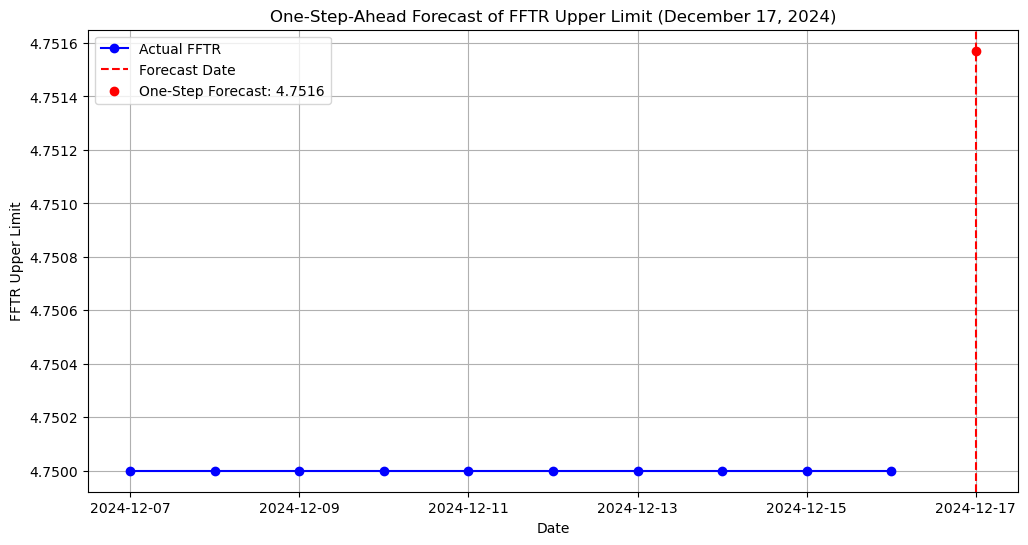

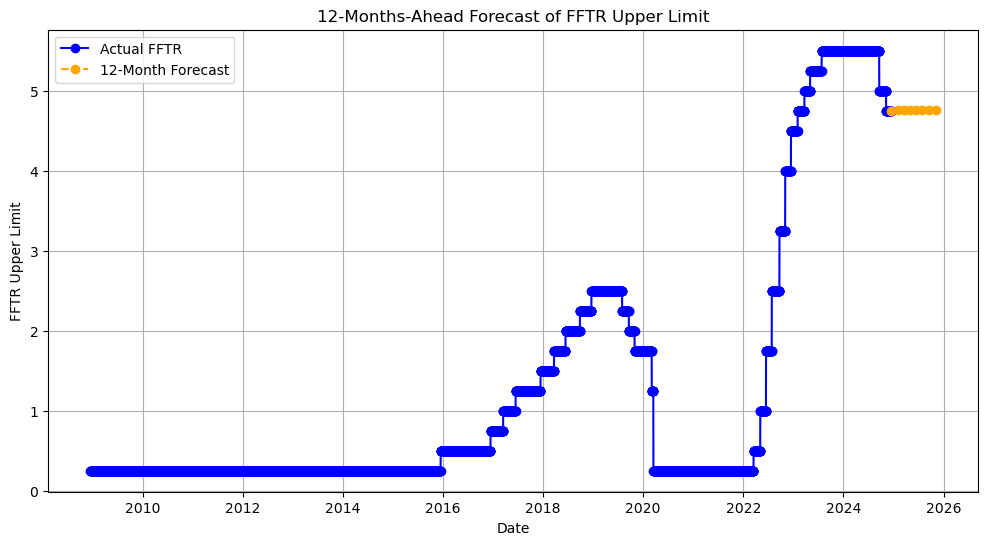

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# One-Step-Ahead Forecast Date
one_step_forecast_date = pd.Timestamp('2024-12-17')  
one_step_forecast_value = forecasted_value  


actual_dates = data.index[-10:]  
actual_values = data['FFTR'][-10:] 


future_dates = [
    pd.Timestamp('2024-12-17'),
    pd.Timestamp('2025-01-30'),
    pd.Timestamp('2025-03-19'),
    pd.Timestamp('2025-05-01'),
    pd.Timestamp('2025-06-11'),
    pd.Timestamp('2025-07-30'),
    pd.Timestamp('2025-09-17'),
    pd.Timestamp('2025-11-06')
]
future_forecast_values = forecast_df['FFTR_forecast'].values  

# Plot 1: One-Step-Ahead Forecast
plt.figure(figsize=(12, 6))
plt.plot(actual_dates, actual_values, label='Actual FFTR', marker='o', color='blue')
plt.axvline(one_step_forecast_date, color='r', linestyle='--', label='Forecast Date')
plt.scatter(one_step_forecast_date, one_step_forecast_value, color='red', zorder=5, 
            label=f'One-Step Forecast: {one_step_forecast_value:.4f}')
plt.title('One-Step-Ahead Forecast of FFTR Upper Limit (December 17, 2024)')
plt.xlabel('Date')
plt.ylabel('FFTR Upper Limit')
plt.legend()
plt.grid()

# Plot 2: 12-Months-Ahead Forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['FFTR'], label='Actual FFTR', marker='o', color='blue')
plt.plot(future_dates, future_forecast_values, label='12-Month Forecast', linestyle='--', marker='o', color='orange')
plt.title('12-Months-Ahead Forecast of FFTR Upper Limit')
plt.xlabel('Date')
plt.ylabel('FFTR Upper Limit')
plt.legend()
plt.grid()

plt.show()




In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


actual_values = data['FFTR'][-len(future_dates):].values  

# Forecasted values: Use 12-month forecasts
forecasted_values = forecast_df['FFTR_forecast'].values


rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
mae = mean_absolute_error(actual_values, forecasted_values)


print("Model Forecast Performance:")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")

Model Forecast Performance:
RMSE (Root Mean Squared Error): 0.0079
MAE (Mean Absolute Error): 0.0070
